In [22]:
# import modules needed
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

In [24]:
# for each jpg image in the directory, collect file name in list
txtfiles = [] 
for file in glob.glob("*.jpg"):
    txtfiles.append(file)
print(txtfiles)

['mona_lisa.jpg', 'headshot_kiahhardcastle.jpg']


array([[117,  48,  94,  94]], dtype=int32)

array([[265, 178, 436, 436]], dtype=int32)

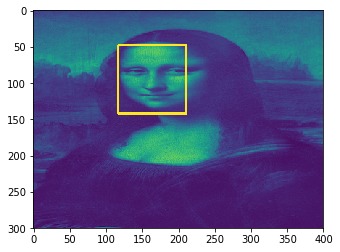

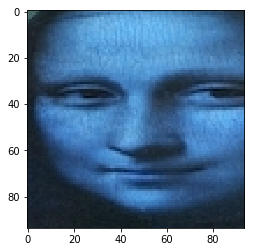

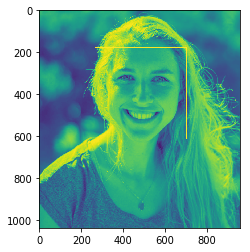

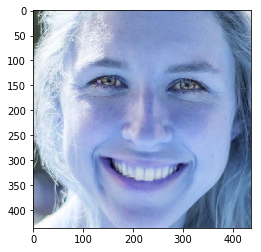

In [34]:
for ix in txtfiles:
    
    # read image, copy it so nothing funky happens, convert to grayscale for opencv
    img = cv2.imread(ix,cv2.IMREAD_COLOR)
    imgtest1 = img.copy()
    imgtest = cv2.cvtColor(imgtest1, cv2.COLOR_BGR2GRAY)

    # load the face classifier
    facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    # run the face classifier for the image. returns bounding box of the face
    faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.2, minNeighbors=5)
    display(faces)
    
    # plot the image and the bounding box of the face
    for (x, y, w, h) in faces:
        # detect the face region and plot it
        face_detect = cv2.rectangle(imgtest, (x, y), (x+w, y+h), (255, 0, 255), 2)
        plt.figure()
        plt.imshow(face_detect)
        
        # save the cropped image
        cropped_image = img[y:y+h, x:x+w]
        ix_cropped = ix + '_crop.jpg'
        cv2.imwrite(ix_cropped,cropped_image)
        
        